### Task 4

Now you will train a text classifier using LSTMs; the data you will work on is a collection of Facebook statuses. Since this is a supervised classification task, you are provided labels corresponding to whether a status is abusive or not, however you will need to implement text preprocessing (cleaning, tokenization, padding) yourself.
- Fully preprocess the data
- Implement and train the model
- Compute and output appropriate classification metrics (*this is essentially free marks, since all you need to do is see if this is binary/multiclass classification task and look through `sklearn.metrics` documentation*)

Required data can be downloaded from the link (https://drive.google.com/drive/folders/1oywYGz6Tbk-7Iq-eScJMyfF6-4x7FKDL?usp=sharing)

In [6]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from datetime import datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [14]:
train_df = pd.read_csv('Dataset/our_train_df.csv', sep='\t')
print(train_df.shape)
train_df.head()
# print(train_df['text'][0])

(1427, 2)


,text,label
0,"Hello, I am in the process of starting up a no...",0
1,Always know we are constantly striving to impr...,0
2,"My daughter, who is grown now, recently told m...",1
3,TODAY IS THE LAST DAY TO VOTE I REALLY NEED Y...,0
4,"Hi my name is Christina, my mother is a recent...",1


Define some prerequisite variables and tokenize the data using keras tokenizer. Use vocabulary size of 200,000, maximum sequence length of 80 and embedding dimension of 150 with pre-padding and pre-truncating sequences for standard training process.

In [33]:
MAX_NB_WORDS = 200_000
MAX_SEQUENCE_LENGTH = 80
EMBEDDING_DIM = 150

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

tokenizer.fit_on_texts(train_df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 11285 unique tokens.


In [30]:
X = tokenizer.texts_to_sequences(train_df['text'].values)
# print(X)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print(X)

print('Shape of data tensor:', X.shape)

[[   0  409    1 ...  172   90 5761]
 [   0    0    0 ...  267  615  348]
 [   0    0    0 ... 1103    4   69]
 ...
 [   0    0    0 ...    2  153  639]
 [   0    0    0 ...   80    2  190]
 [   0    0    0 ...   16   62   36]]
Shape of data tensor: (1427, 80)


In [32]:
Y = train_df['label'].values
print(Y)
print('Shape of label tensor:', Y.shape)

[0 0 1 ... 0 0 0]
Shape of label tensor: (1427,)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1284, 80) (1284,)
(143, 80) (143,)


In [24]:
########################################
## define the model structure
########################################
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(1, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 80, 150)           30000000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 30,100,501
Trainable params: 30,100,501
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
########################################
## train the model
########################################
epochs = 15
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# if you want the callbacks, you can copy them from task2

Train on 1155 samples, validate on 129 samples
Epoch 1/15
1155/1155 [==============================] - 27s 23ms/step - loss: 10.2280 - acc: 0.3584 - val_loss: 10.7518 - val_acc: 0.3256
Epoch 2/15
1155/1155 [==============================] - 27s 24ms/step - loss: 10.2280 - acc: 0.3584 - val_loss: 10.7518 - val_acc: 0.3256
Epoch 3/15
1155/1155 [==============================] - 27s 23ms/step - loss: 10.2280 - acc: 0.3584 - val_loss: 10.7518 - val_acc: 0.3256
Epoch 4/15
1155/1155 [==============================] - 27s 24ms/step - loss: 10.2280 - acc: 0.3584 - val_loss: 10.7518 - val_acc: 0.3256
Epoch 5/15
1155/1155 [==============================] - 25s 22ms/step - loss: 10.2280 - acc: 0.3584 - val_loss: 10.7518 - val_acc: 0.3256
Epoch 6/15
1155/1155 [==============================] - 26s 23ms/step - loss: 10.2280 - acc: 0.3584 - val_loss: 10.7518 - val_acc: 0.3256
Epoch 7/15
 960/1155 [=======================>......] - ETA: 4s - loss: 10.4954 - acc: 0.3417

KeyboardInterrupt: 

In [26]:
########################################
## make predictions and compute metrics
########################################
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))



143/143 [==============================] - 0s 3ms/step
Test set
  Loss: 10.480
  Accuracy: 0.343


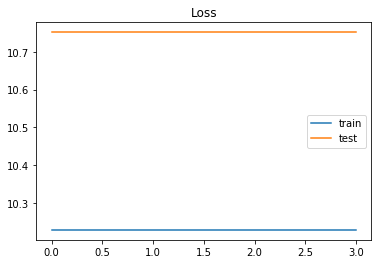

In [27]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
